In [1]:
import torch
from dataset.utils import *
from losses import *
from utils import *
from net.resnet import *
from net.googlenet import *
from net.bn_inception import *
from train import train_model

In [2]:
batch_size = 512
train_dataset = make_dataset('LFW', split='train')
test_dataset = make_dataset('LFW', split='test')
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


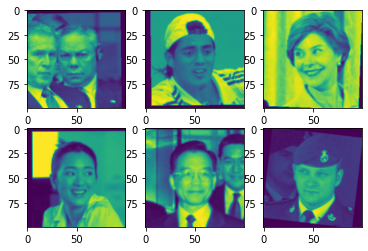

In [3]:
display_images(train_loader, h=2,w=3)

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
epochs = 20
learning_rate = 0.001
loss_lr = 0.01
num_classes = get_num_classes(train_dataset)
embedding_size = num_classes

In [4]:
model = Resnet50(embedding_size=embedding_size, pretrained=True)
model.to(device)
evaluate_accuracy(model, test_loader)

Test Accuracy: 0.00%
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       1.0
          17       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00      19.0
          23       0.00      0.00      0.00       2.0
          24       0.00      0.00      0.00       1.0
          26       0.00      0.00      0.00       3.0
          30       0.00      0.00      0.00       1.0
          33       0.00      0.00      0.00       1.0
          38       0.00      0.00      0.00       3.0
          44       0.00      0.00      0.00       1.0
          47       0.00      0.00      0.00       1.0
          49       0.00      0.00      0.00       1.0
          50       0.00      0.00      0.00       1.0
      

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
evaluate_cos(model, test_loader)

100%|██████████| 8/8 [00:04<00:00,  1.93it/s]


R@1 : 6.446
R@2 : 9.412
R@4 : 12.972
R@8 : 16.802
R@16 : 22.168
R@32 : 27.805


[0.06445523193096009,
 0.09412081984897519,
 0.1297195253505933,
 0.1680151024811219,
 0.22168284789644013,
 0.27804746494066884]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


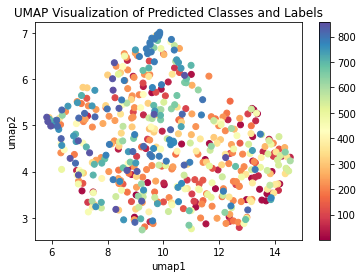

In [5]:
visualize_umap(model, test_loader)

In [5]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=20,
                    learning_rate=0.0001,
                    gamma=0.5,
                    save_path='./saved_models/resnet50_lfw_proxy.ptm')

Step: [3/19] Epoch [1/20] Loss: 2.0656 Time: 5.1385
Step: [6/19] Epoch [1/20] Loss: 4.1057 Time: 7.7383
Step: [9/19] Epoch [1/20] Loss: 6.1112 Time: 10.3381
Step: [12/19] Epoch [1/20] Loss: 8.0706 Time: 13.3457
Step: [15/19] Epoch [1/20] Loss: 10.0151 Time: 15.9384
Step: [18/19] Epoch [1/20] Loss: 11.9422 Time: 18.6383
Step: [19/19] Epoch [1/20] Loss: 12.5495 Time: 19.2440
Epoch [1/20] Loss: 12.5495 Time: 19.2472
Step: [3/19] Epoch [2/20] Loss: 1.7069 Time: 21.8383
Step: [6/19] Epoch [2/20] Loss: 3.3635 Time: 24.3382
Step: [9/19] Epoch [2/20] Loss: 5.0032 Time: 27.0380
Step: [12/19] Epoch [2/20] Loss: 6.6241 Time: 29.6381
Step: [15/19] Epoch [2/20] Loss: 8.2089 Time: 32.3382
Step: [18/19] Epoch [2/20] Loss: 9.7780 Time: 35.1383
Step: [19/19] Epoch [2/20] Loss: 10.2584 Time: 35.7380
Epoch [2/20] Loss: 10.2584 Time: 35.7387
Step: [3/19] Epoch [3/20] Loss: 1.4000 Time: 38.3383
Step: [6/19] Epoch [3/20] Loss: 2.7307 Time: 40.9383
Step: [9/19] Epoch [3/20] Loss: 4.0263 Time: 43.5384
Step: [

Step: [12/19] Epoch [20/20] Loss: 0.4407 Time: 339.0615
Step: [15/19] Epoch [20/20] Loss: 0.5505 Time: 341.8382
Step: [18/19] Epoch [20/20] Loss: 0.6614 Time: 344.5445
Step: [19/19] Epoch [20/20] Loss: 0.6942 Time: 345.0614
Epoch [20/20] Loss: 0.6942 Time: 345.1381
Finished Training, Time: 345.1383


In [6]:
model = torch.load('./saved_models/resnet50_lfw_proxy.ptm')
evaluate_accuracy(model, test_loader)

Test Accuracy: 0.00%
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       0.0
          15       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       0.0
          17       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       0.0
          19       0.00      0.00      0.00       0.0
      

In [7]:
evaluate_cos(model, test_loader)

100%|██████████| 8/8 [00:04<00:00,  1.87it/s]


R@1 : 7.794
R@2 : 11.192
R@4 : 14.833
R@8 : 19.552
R@16 : 24.811
R@32 : 30.879


[0.0779395900755124,
 0.11192017259978425,
 0.1483279395900755,
 0.19552319309600863,
 0.2481121898597627,
 0.3087918015102481]

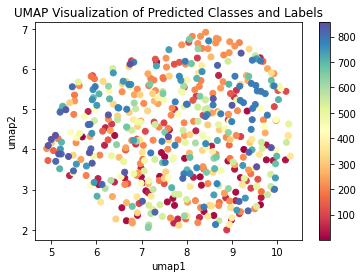

In [9]:
visualize_umap(model, test_loader)

Progress: 1/8 batch
Progress: 2/8 batch
Progress: 3/8 batch
Progress: 4/8 batch
Progress: 5/8 batch
Progress: 6/8 batch
Progress: 7/8 batch
Progress: 8/8 batch


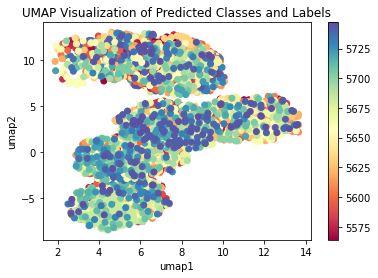

In [11]:
visualize_umap(model, test_loader, single=False)

In [4]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=20,
                    learning_rate=0.0001,
                    gamma=0.5,
                    save_path='./saved_models/resnet50_lfw_proxy_nolossopt.ptm')

Step: [3/19] Epoch [1/20] Loss: 2.0686 Time: 11.2360
Step: [6/19] Epoch [1/20] Loss: 4.1308 Time: 14.0206
Step: [9/19] Epoch [1/20] Loss: 6.1958 Time: 17.1206
Step: [12/19] Epoch [1/20] Loss: 8.2431 Time: 19.9207
Step: [15/19] Epoch [1/20] Loss: 10.2917 Time: 22.8206
Step: [18/19] Epoch [1/20] Loss: 12.3184 Time: 25.7209
Step: [19/19] Epoch [1/20] Loss: 12.9666 Time: 26.4203
Epoch [1/20] Loss: 12.9666 Time: 26.4230
Step: [3/19] Epoch [2/20] Loss: 1.8896 Time: 29.2412
Step: [6/19] Epoch [2/20] Loss: 3.7513 Time: 32.1207
Step: [9/19] Epoch [2/20] Loss: 5.6159 Time: 34.9313
Step: [12/19] Epoch [2/20] Loss: 7.4704 Time: 37.8849
Step: [15/19] Epoch [2/20] Loss: 9.3131 Time: 40.6207
Step: [18/19] Epoch [2/20] Loss: 11.1462 Time: 43.4206
Step: [19/19] Epoch [2/20] Loss: 11.7312 Time: 44.0203
Epoch [2/20] Loss: 11.7312 Time: 44.0232
Step: [3/19] Epoch [3/20] Loss: 1.7450 Time: 46.7206
Step: [6/19] Epoch [3/20] Loss: 3.4658 Time: 49.3206
Step: [9/19] Epoch [3/20] Loss: 5.1813 Time: 52.0206
Step

Step: [9/19] Epoch [20/20] Loss: 4.4718 Time: 343.2204
Step: [12/19] Epoch [20/20] Loss: 5.9622 Time: 345.7294
Step: [15/19] Epoch [20/20] Loss: 7.4531 Time: 348.5205
Step: [18/19] Epoch [20/20] Loss: 8.9440 Time: 351.1201
Step: [19/19] Epoch [20/20] Loss: 9.4145 Time: 351.6203
Epoch [20/20] Loss: 9.4145 Time: 351.6211
Finished Training, Time: 351.6214


In [8]:
model = torch.load('./saved_models/resnet50_lfw_proxy_nolossopt.ptm')
evaluate_accuracy(model, test_loader)

Test Accuracy: 0.00%
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       1.0
          17       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00      19.0
          23       0.00      0.00      0.00       2.0
          24       0.00      0.00      0.00       1.0
          26       0.00      0.00      0.00       3.0
          29       0.00      0.00      0.00       0.0
          30       0.00      0.00      0.00       1.0
          33       0.00      0.00      0.00       1.0
          36       0.00      0.00      0.00       0.0
          38       0.00      0.00      0.00       3.0
          44       0.00      0.00      0.00       1.0
          47       0.00      0.00      0.00       1.0
      

In [9]:
evaluate_cos(model, test_loader)

100%|██████████| 8/8 [00:03<00:00,  2.01it/s]


R@1 : 4.072
R@2 : 5.852
R@4 : 8.900
R@8 : 12.945
R@16 : 17.880
R@32 : 23.301


[0.040722761596548,
 0.05852211434735707,
 0.0889967637540453,
 0.12944983818770225,
 0.17880258899676377,
 0.23300970873786409]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


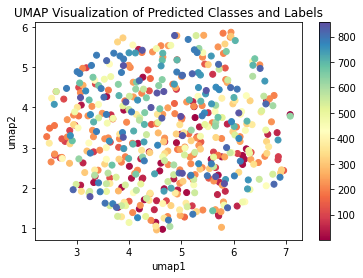

In [6]:
visualize_umap(model, test_loader)

Progress: 1/8 batch
Progress: 2/8 batch
Progress: 3/8 batch
Progress: 4/8 batch
Progress: 5/8 batch
Progress: 6/8 batch
Progress: 7/8 batch
Progress: 8/8 batch


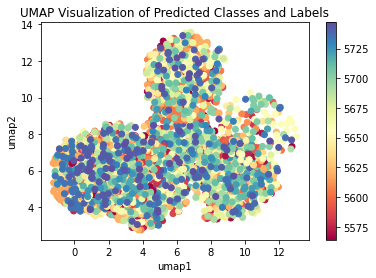

In [7]:
visualize_umap(model, test_loader, single=False)

In [3]:
batch_size = 512
train_dataset = make_dataset('CIFAR10', split='train')
test_dataset = make_dataset('CIFAR10', split='test')
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


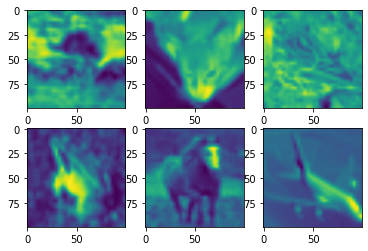

In [5]:
display_images(train_loader, h=2,w=3)

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
epochs = 20
learning_rate = 0.001
loss_lr = 0.01
num_classes = get_num_classes(train_dataset)
embedding_size = num_classes

In [7]:
model = Resnet50(embedding_size=embedding_size, pretrained=True)
model.to(device)
evaluate_accuracy(model, test_loader)

Test Accuracy: 11.04%
              precision    recall  f1-score   support

           0       0.09      0.04      0.06      1000
           1       0.09      0.00      0.00      1000
           2       0.17      0.01      0.02      1000
           3       0.13      0.48      0.20      1000
           4       0.00      0.00      0.00      1000
           5       0.02      0.00      0.01      1000
           6       0.00      0.00      0.00      1000
           7       0.10      0.53      0.17      1000
           8       0.08      0.04      0.05      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.11     10000
   macro avg       0.07      0.11      0.05     10000
weighted avg       0.07      0.11      0.05     10000



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
evaluate_cos(model, test_loader)

100%|██████████| 20/20 [00:03<00:00,  5.23it/s]


R@1 : 22.380
R@2 : 37.160
R@4 : 55.330
R@8 : 73.550
R@16 : 88.180
R@32 : 95.960


[0.2238, 0.3716, 0.5533, 0.7355, 0.8818, 0.9596]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


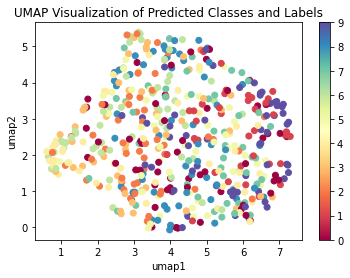

In [9]:
visualize_umap(model, test_loader)

In [10]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=20,
                    learning_rate=0.0001,
                    gamma=0.5,
                    save_path='./saved_models/resnet50_cifar10_proxy.ptm')

Step: [19/98] Epoch [1/20] Loss: 3.0055 Time: 7.7950
Step: [38/98] Epoch [1/20] Loss: 5.7869 Time: 15.2414
Step: [57/98] Epoch [1/20] Loss: 8.4629 Time: 22.5806
Step: [76/98] Epoch [1/20] Loss: 11.0965 Time: 29.8965
Step: [95/98] Epoch [1/20] Loss: 13.6574 Time: 37.2087
Step: [98/98] Epoch [1/20] Loss: 14.0497 Time: 38.1683
Epoch [1/20] Loss: 14.0497 Time: 38.1687
Step: [19/98] Epoch [2/20] Loss: 2.3421 Time: 45.8874
Step: [38/98] Epoch [2/20] Loss: 4.7130 Time: 53.3337
Step: [57/98] Epoch [2/20] Loss: 7.0903 Time: 60.6855
Step: [76/98] Epoch [2/20] Loss: 9.4499 Time: 68.0215
Step: [95/98] Epoch [2/20] Loss: 11.8180 Time: 75.3578
Step: [98/98] Epoch [2/20] Loss: 12.1856 Time: 76.4109
Epoch [2/20] Loss: 12.1856 Time: 76.4124
Step: [19/98] Epoch [3/20] Loss: 2.0074 Time: 84.0027
Step: [38/98] Epoch [3/20] Loss: 4.1328 Time: 91.4365
Step: [57/98] Epoch [3/20] Loss: 6.3858 Time: 98.8067
Step: [76/98] Epoch [3/20] Loss: 8.5560 Time: 106.2138
Step: [95/98] Epoch [3/20] Loss: 10.6129 Time: 11

In [11]:
model = torch.load('./saved_models/resnet50_cifar10_proxy.ptm')
evaluate_accuracy(model, test_loader)

Test Accuracy: 0.00%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    1000.0
           1       0.00      0.00      0.00    1000.0
           2       0.00      0.00      0.00    1000.0
           3       0.00      0.00      0.00    1000.0
           4       0.00      0.00      0.00    1000.0
           5       0.00      0.00      0.00    1000.0
           6       0.00      0.00      0.00    1000.0
           7       0.00      0.00      0.00    1000.0
           8       0.00      0.00      0.00    1000.0
           9       0.00      0.00      0.00    1000.0
          11       0.00      0.00      0.00       0.0
          24       0.00      0.00      0.00       0.0
          28       0.00      0.00      0.00       0.0
          40       0.00      0.00      0.00       0.0
          44       0.00      0.00      0.00       0.0
          45       0.00      0.00      0.00       0.0
          49       0.00      0.00      0.00       0.0
      

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
evaluate_cos(model, test_loader)

100%|██████████| 20/20 [00:03<00:00,  5.33it/s]


R@1 : 91.350
R@2 : 93.860
R@4 : 95.530
R@8 : 96.570
R@16 : 97.110
R@32 : 97.580


[0.9135, 0.9386, 0.9553, 0.9657, 0.9711, 0.9758]

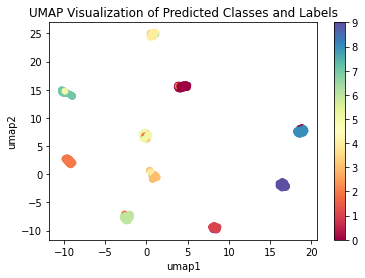

In [13]:
visualize_umap(model, test_loader)

Progress: 1/20 batch
Progress: 2/20 batch
Progress: 3/20 batch
Progress: 4/20 batch
Progress: 5/20 batch
Progress: 6/20 batch
Progress: 7/20 batch
Progress: 8/20 batch
Progress: 9/20 batch
Progress: 10/20 batch
Progress: 11/20 batch
Progress: 12/20 batch
Progress: 13/20 batch
Progress: 14/20 batch
Progress: 15/20 batch
Progress: 16/20 batch
Progress: 17/20 batch
Progress: 18/20 batch
Progress: 19/20 batch
Progress: 20/20 batch


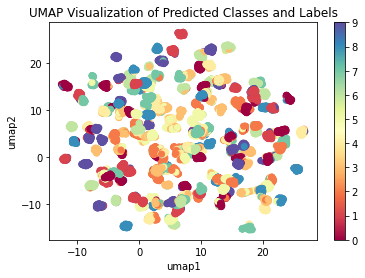

In [14]:
visualize_umap(model, test_loader, single=False)

In [15]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=20,
                    learning_rate=0.0001,
                    gamma=0.5,
                    save_path='./saved_models/resnet50_cifar10_proxy_nolossopt.ptm')

Step: [19/98] Epoch [1/20] Loss: 3.0131 Time: 7.5785
Step: [38/98] Epoch [1/20] Loss: 5.7932 Time: 14.9055
Step: [57/98] Epoch [1/20] Loss: 8.4628 Time: 22.2719
Step: [76/98] Epoch [1/20] Loss: 11.0917 Time: 29.6065
Step: [95/98] Epoch [1/20] Loss: 13.6516 Time: 36.9724
Step: [98/98] Epoch [1/20] Loss: 14.0457 Time: 38.0407
Epoch [1/20] Loss: 14.0457 Time: 38.0434
Step: [19/98] Epoch [2/20] Loss: 2.3250 Time: 45.8057
Step: [38/98] Epoch [2/20] Loss: 4.7470 Time: 53.1272
Step: [57/98] Epoch [2/20] Loss: 7.1303 Time: 60.4504
Step: [76/98] Epoch [2/20] Loss: 9.4891 Time: 67.7742
Step: [95/98] Epoch [2/20] Loss: 11.8531 Time: 75.0789
Step: [98/98] Epoch [2/20] Loss: 12.2074 Time: 76.1095
Epoch [2/20] Loss: 12.2074 Time: 76.1118
Step: [19/98] Epoch [3/20] Loss: 1.9564 Time: 83.8510
Step: [38/98] Epoch [3/20] Loss: 4.1458 Time: 91.1662
Step: [57/98] Epoch [3/20] Loss: 6.4679 Time: 98.5030
Step: [76/98] Epoch [3/20] Loss: 8.6070 Time: 106.0035
Step: [95/98] Epoch [3/20] Loss: 10.7362 Time: 11

In [17]:
model = torch.load('./saved_models/resnet50_cifar10_proxy_nolossopt.ptm')
evaluate_accuracy(model, test_loader)

Test Accuracy: 0.08%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.25      0.01      0.02      1000
           9       0.00      0.00      0.00      1000
          13       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         0
          30       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         0
          40       0.00      0.00      0.00         0
          44       0.00      0.00      0.00         0
          64       0.00      0.00      0.00         0
      

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
evaluate_cos(model, test_loader)

100%|██████████| 20/20 [00:04<00:00,  4.92it/s]


R@1 : 91.420
R@2 : 94.160
R@4 : 95.720
R@8 : 96.540
R@16 : 97.100
R@32 : 97.520


[0.9142, 0.9416, 0.9572, 0.9654, 0.971, 0.9752]

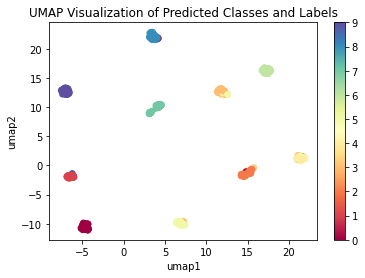

In [19]:
visualize_umap(model, test_loader)

Progress: 1/20 batch
Progress: 2/20 batch
Progress: 3/20 batch
Progress: 4/20 batch
Progress: 5/20 batch
Progress: 6/20 batch
Progress: 7/20 batch
Progress: 8/20 batch
Progress: 9/20 batch
Progress: 10/20 batch
Progress: 11/20 batch
Progress: 12/20 batch
Progress: 13/20 batch
Progress: 14/20 batch
Progress: 15/20 batch
Progress: 16/20 batch
Progress: 17/20 batch
Progress: 18/20 batch
Progress: 19/20 batch
Progress: 20/20 batch


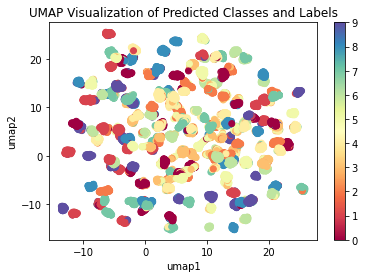

In [20]:
visualize_umap(model, test_loader, single=False)